In [2]:
#import dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import scipy.stats as st
import gmaps
import gmaps.datasets


In [3]:
corrected_data_path = "Resources2/dummy_data.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df

,date,state,infected,landed flights,month
0,3/24/2020,GU,32,3,December
1,3/24/2020,AK,36,14,February
2,3/24/2020,DC,137,21,June
3,3/24/2020,DE,91,23,August
4,3/24/2020,AR,218,44,September
...,...,...,...,...,...
10820,10/20/2020,CA,874077,3286,December
10821,10/20/2020,FL,760389,3662,February
10822,10/20/2020,IL,354462,3714,October
10823,10/20/2020,WI,187828,4686,October


Text(0, 0.5, 'Counts')

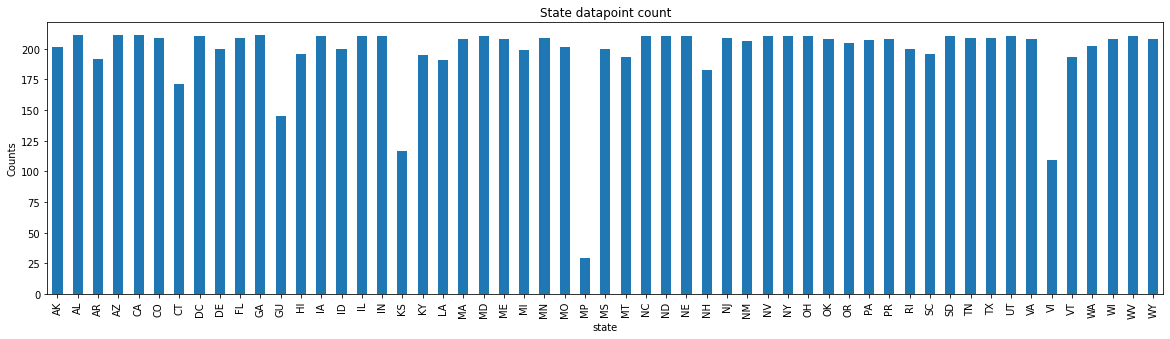

In [4]:
#total number of datapoint per state (to check the number of data points are fairly simimral )
state_gb = corrected_data_df.groupby(["state"])
count_st = state_gb.count()["infected"]
count_chart= count_st.plot(kind= "bar", figsize=(20,5))
plt.title("State datapoint count")
count_chart.set_ylabel("Counts")


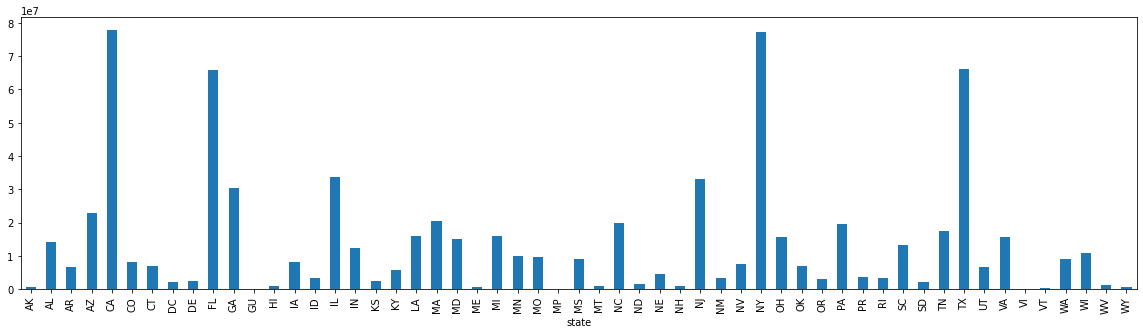

In [5]:
#total number of infected people per state in a year
state_gb = corrected_data_df.groupby(["state"])
state_count = state_gb.sum()["infected"]
state_count.head(12)
count_chart = state_count.plot(kind = "bar", figsize= (20,5))
plt.show()

In [6]:
infected_groups = corrected_data_df.groupby(["state", "month"])
sum_it_up = infected_groups.sum()
sum_it_up.head(15)

infected  landed flights
state month                              
AK    April         50327             849
      August        57501             831
      December      64488             753
      February      71381            1492
      January       49048             965
      July          51585            1042
      June          72305            1227
      March         18631             439
      May           72666            1383
      November      56565             954
      October       59342            1309
      September     48550            1166
AL    April        894328           18066
      August      1132617           12016
      December    1094015           10386

what state?CA


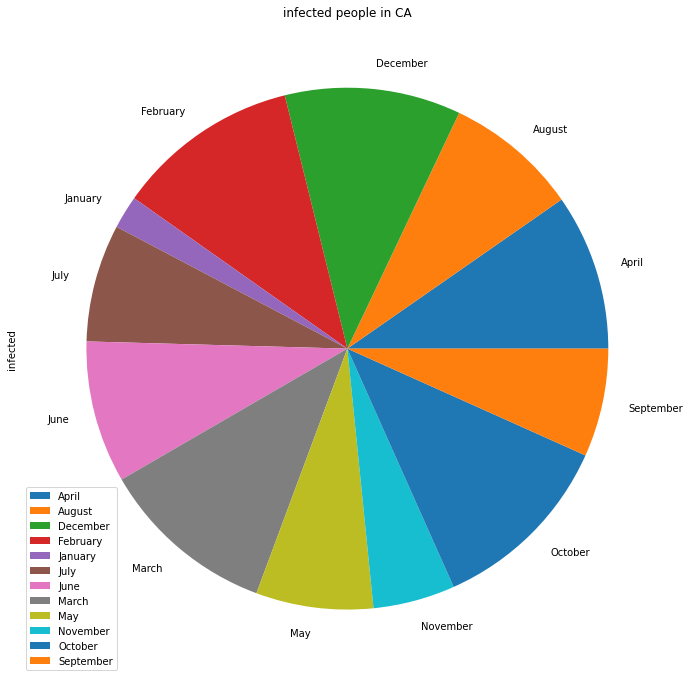

In [7]:
#just one state monthly

state_code = input("what state?")
#state_code = "CA"
just_one_state = sum_it_up.loc[state_code]
state_pie = just_one_state.plot(kind ="pie", y= "infected", title= ("infected people in " + state_code), figsize= (12,12))
state_pie.set_ylabel("infected")

plt.show()
#plt.axis("equal")

In [8]:
reduced_data = corrected_data_df[["state", "month", "infected"]]
reduced_data
month_list = reduced_data["month"].unique()
month_list
state_list = reduced_data["state"].unique()
state_list
month_gb = reduced_data.groupby(["month"])
sum_month = month_gb.sum()
sum_month

,infected
month,
April,65433726
August,63303515
December,64063341
February,68480924
January,63119980
July,61199382
June,61731451
March,64785128
May,55694354


In [10]:
#which month has the highest number of infected people
reduced_data


,state,month,infected
0,GU,December,32
1,AK,February,36
2,DC,June,137
3,DE,August,91
4,AR,September,218
...,...,...,...
10820,CA,December,874077
10821,FL,February,760389
10822,IL,October,354462
10823,WI,October,187828


In [17]:
#not working ?????????????????????????
for state in state_list:
    for month in month_list:
    
        state_data = reduced_data[( reduced_data["state"] == state)& (reduced_data["month"]== month)]
        state_data_gb = state_data.groupby(["state", "infected"])

        state_data_df = state_data_gb["infected"].sum().to_frame()
state_data_df.head(10)
        #state_data_index= state_data_df.unstack(0)
        #state_data_plot = state_data_index["infected"]
########### 

        #plt.figure()


        #plot_cap, = plt.plot(state_list, state_data_plot["CA"])

,,infected
state,infected,
MP,13,13


In [24]:
state_data = reduced_data[( reduced_data["state"] == "NJ")]
        
                          #state_data_gb = state_data.groupby(["state", "infected"])

       # state_data_df = state_data_gb["infected"].sum().to_frame()
state_data.head(10)
month_list = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
month_num = [1,2,3,4,5,6,7,8,9,10,11,12]
#state_data.sort_values("month")
state_data_ordered= pd.Categorical(state_data['month'].month.apply(mapper),
               categories=month_list,
               ordered=True)
state_data_ordered

AttributeError: 'Series' object has no attribute 'month'

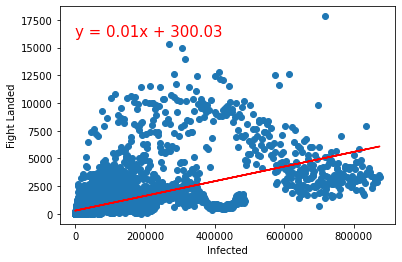

In [15]:
infected_values = corrected_data_df["infected"]
flights_values = corrected_data_df["landed flights"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(infected_values, flights_values)
regress_values = infected_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(infected_values,flights_values)


plt.plot(infected_values,regress_values,"r-")
plt.annotate(line_eq,(20,16000),fontsize=15,color="red")
plt.xlabel('Infected')
plt.ylabel('Fight Landed')
plt.show()

In [14]:
correlation = st.pearsonr(corrected_data_df["infected"], corrected_data_df["landed flights"])
print(correlation)

(0.6021039208630193, 0.0)
